In [1]:
import numpy as np
from numpy.random import multivariate_normal
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.linear_model import LinearRegression
import math

Generate random data. Change $\verb|cov|$ to values $>0$ for correlated data.

In [2]:
N=100000
var1 = 1
var2 = 2
cov = 0
cov_matrix=[[var1,cov],
            [cov, var2]]
mean1 = 10
mean2 = 100
mean_vector = [mean1,mean2]

In [3]:
def generate_data(mean_vector, cov_matrix, N, verbose = False):
    data = multivariate_normal(mean_vector, cov_matrix, size=N)
    x = data[:,0]
    y = data[:,1]
    if verbose:
        plt.scatter(x,y)
        print("Mean response: "+str(mean(y)))
    return (x, y)

Mean response: 99.9938815367525


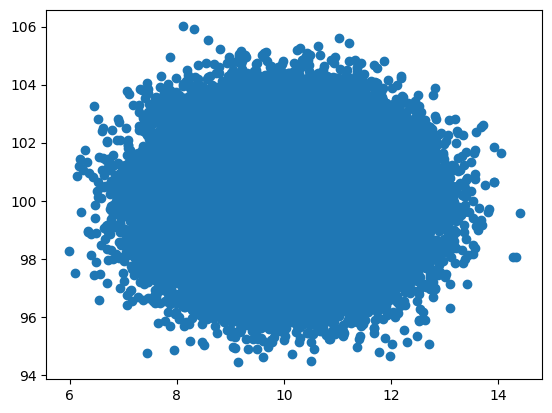

In [4]:
x, y = generate_data(mean_vector, cov_matrix, N, True)

Total sum of squares.

In [5]:
def TSS(a):
    m = mean(a)
    #print(m)
    n = 0
    for i in a:
        n += ((i-m)**2)
    return (n)
TSS([1,2,3,4,5]) # expect 10

10

In [6]:
tss=TSS(y)
tss

199060.175960853

Linear regression.

In [7]:
def LR(x, y, verbose = False, var1 = 4):
    X = x.reshape(-1, 1) 
    Y = y.reshape(-1, 1) 
    model = LinearRegression()
    model.fit(X, Y)
    Y_hat = model.predict(X)

    if verbose:
        r_sq = model.score(X, Y)
        print(f"coefficient of determination: {r_sq}")
        b = model.intercept_[0]
        a = model.coef_[0][0]
        print(f"coefficients a, b: {a,b}")
        std3= 3* math.sqrt(var1)
        x_ = np.linspace(mean1-std3, mean1+std3)
        y_ = a*x_+b
        plt.plot(x_, y_,'r')
        plt.scatter(x,y)
    y_hat = Y_hat.reshape(-1).tolist()
    return y_hat

coefficient of determination: 7.866195330663572e-06
coefficients a, b: (0.003960577331391337, 99.95428912941401)


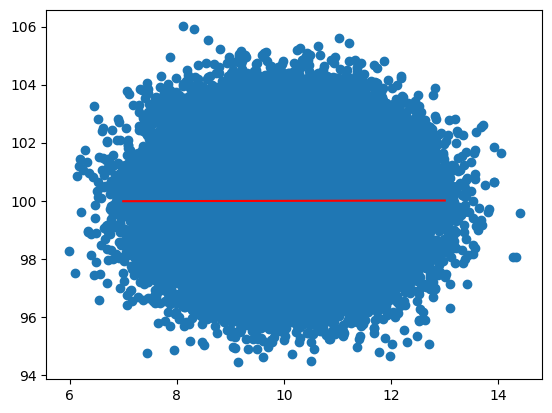

In [8]:
y_hat = LR(x, y, True, var1)

Residual sum of squares.

In [9]:
def RSS(a,b):
    n = 0
    for i in range(len(a)): 
        n += ((a[i]-b[i])**2)
    return (n)
RSS([1,2,3,4,5],[5,4,3,2,1]) # expect 40

40

In [10]:
rss=RSS(y_hat, y)
rss

199058.61011462595

Estimate of coefficient of determination (cf. to LR analysis result above).

In [11]:
(tss-rss)/tss

7.866195332607174e-06

If cov = 0 then the term below estimates var2 (= variance of prediction error).

In [12]:
tss-rss 

1.5658462270512246

The term below estimates variance of prediction error (too).

In [13]:
rss/(N-2)

1.9906259136645328

$F$ statistic. An $F$-statistic is the ratio of two variances.

In [14]:
(tss-rss)/(rss/(N-2))

0.7866099884978722

If cov = 0 then the expectation of $E[F]=1$. Otherwise $E[F]>>1$.

In [15]:
tsss = []
rsss = []
Fs = []
for i in range(1000):
    x, y = generate_data(mean_vector, cov_matrix, N)
    tss=TSS(y)
    tsss.append(tss)
    y_hat = LR(x, y, False, var1)
    rss=RSS(y_hat, y)
    rsss.append(rss)
    F = (tss-rss)/(rss/(N-2))
    Fs.append(F)

In [16]:
mean(Fs)

1.0353016889244593